<a href="https://colab.research.google.com/github/farheen2605/SlashMark_Basic/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
print(os.listdir())  # Should show 'mnist_loader.py'


['.config', 'mnist_loader.py', 'sample_data']


In [4]:
import os

# List all files in the data directory
path = '/content/data/'
if os.path.exists(path):
    print("Files in /content/data/:", os.listdir(path))
else:
    print("Directory '/content/data/' does not exist!")


Directory '/content/data/' does not exist!


In [5]:
from google.colab import files
uploaded = files.upload()  # Upload train-images-idx3-ubyte, train-labels-idx1-ubyte, etc.


Saving train-images-idx3-ubyte to train-images-idx3-ubyte
Saving train-labels-idx1-ubyte to train-labels-idx1-ubyte
Saving t10k-images-idx3-ubyte to t10k-images-idx3-ubyte
Saving t10k-labels-idx1-ubyte to t10k-labels-idx1-ubyte


In [6]:
import shutil
import os

os.makedirs('/content/data', exist_ok=True)  # Create the directory if it doesn't exist
for filename in uploaded.keys():
    shutil.move(filename, '/content/data/')



Loading MNIST Data...

Loading Training Data...

Loading Testing Data...

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

KNN Trained Classifier Confidence:  0.9698333333333333

Predicted Values:  [7 2 0 ... 6 2 1]

Accuracy of Classifier on Validation Image Data:  0.9698333333333333

Confusion Matrix: 
 [[595   0   0   0   1   0   2   0   0   0]
 [  0 667   1   0   2   0   1   2   0   0]
 [  1   8 584   1   2   1   1  11   1   0]
 [  0   0   5 597   0   5   0   9   3   0]
 [  1   3   0   0 574   0   0   1   0  12]
 [  3   0   0   6   2 503   6   1   0   3]
 [  5   2   0   0   2   1 546   0   0   0]
 [  0   6   0   0   3   0   0 596   0   5]
 [  4   4   3   5   2   8   3   4 561   6]
 [  2   2   0   6   2   0   2 

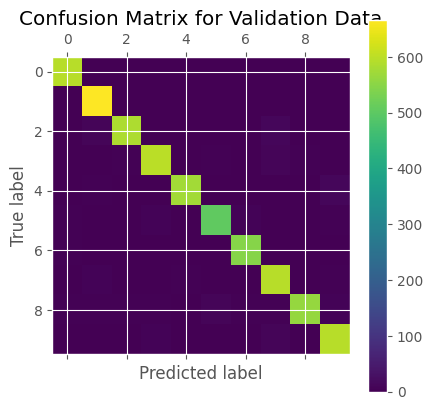


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9674

Confusion Matrix for Test Data: 
 [[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   9    9  989    2    1    0    1   18    3    0]
 [   0    3    4  975    1   12    1    6    5    3]
 [   3    7    0    0  943    0    4    3    1   21]
 [   5    0    0    9    2  864    5    1    3    3]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   24    4    0    3    0    0  983    0   14]
 [   8    4    5   14    6   12    6    5  910    4]
 [   5    7    3    8    7    4    1   11    4  959]]


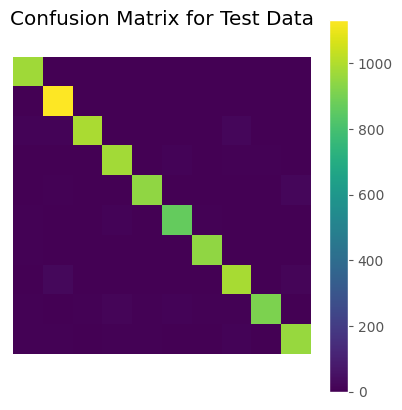

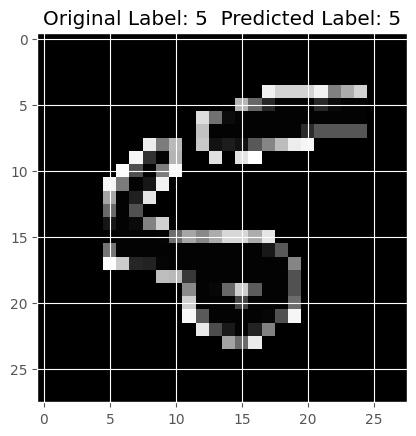

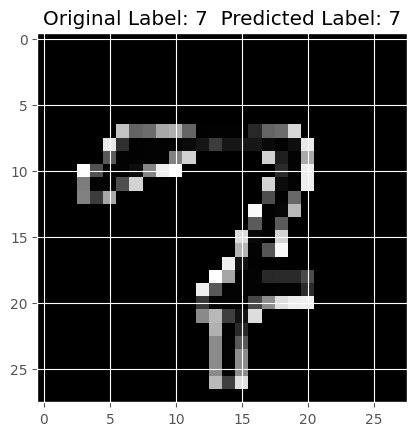

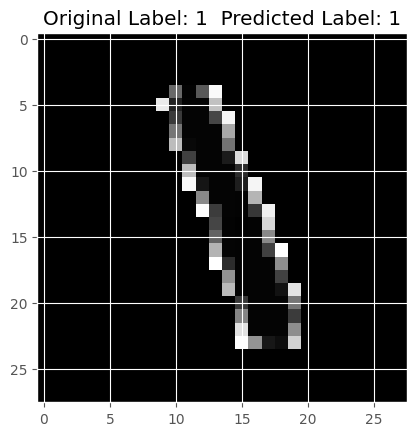

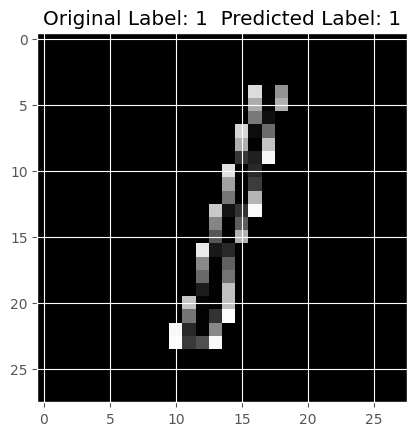

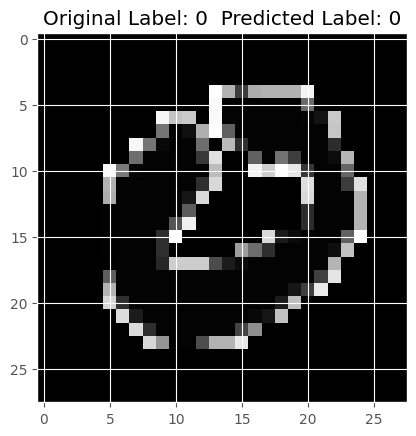

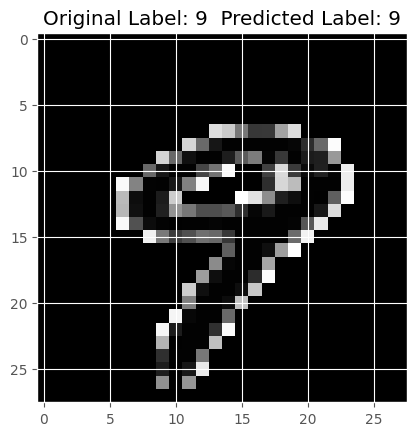

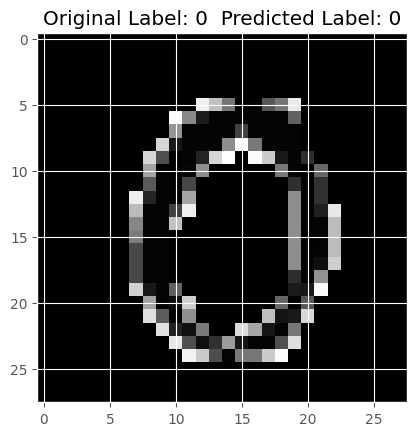

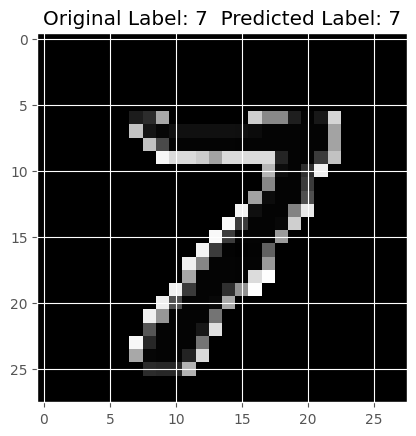

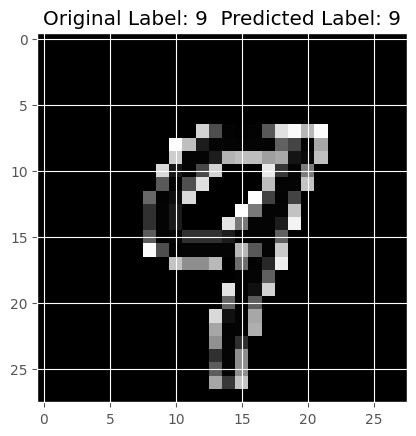

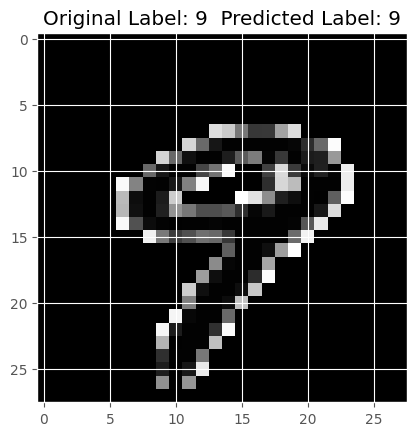

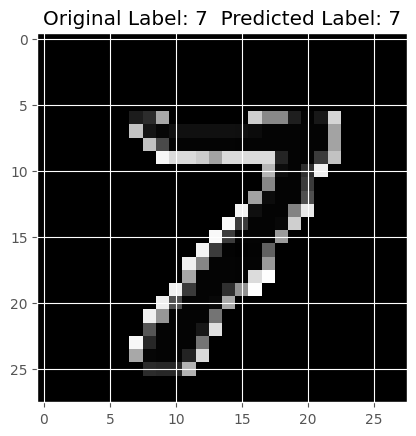

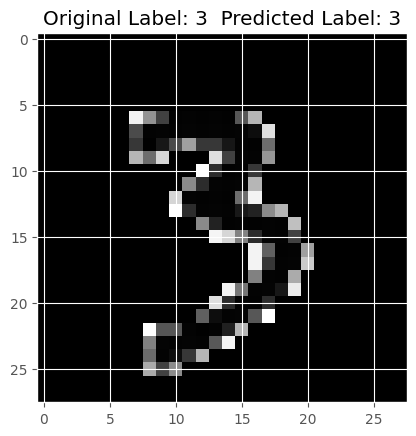

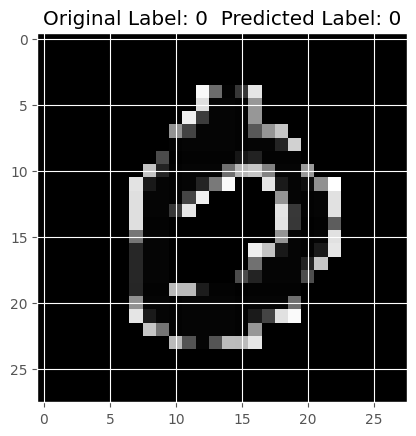

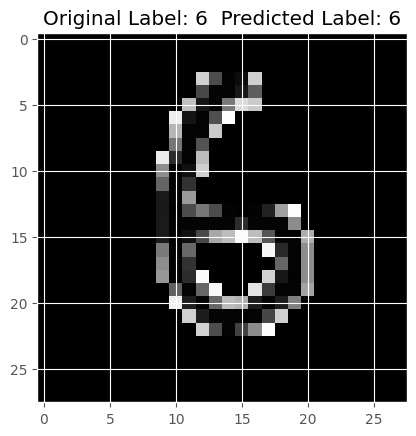

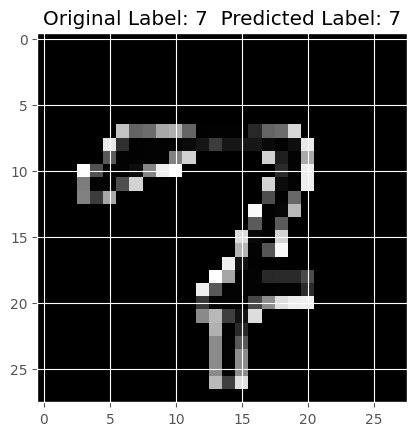

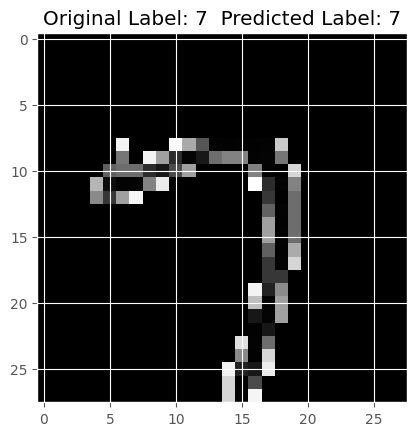

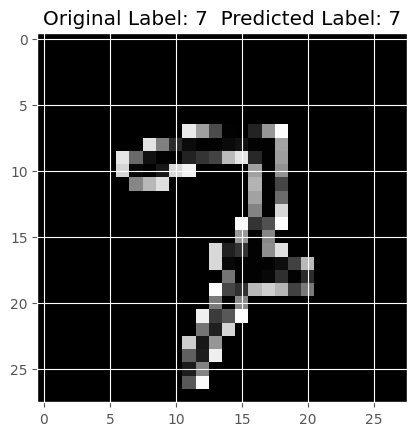

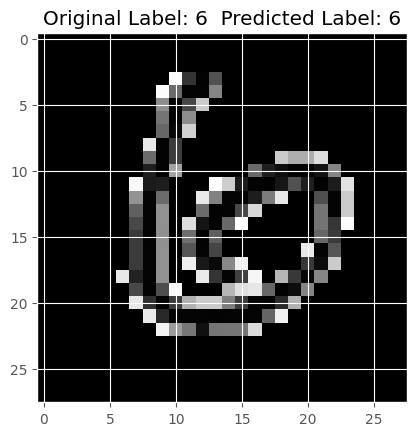

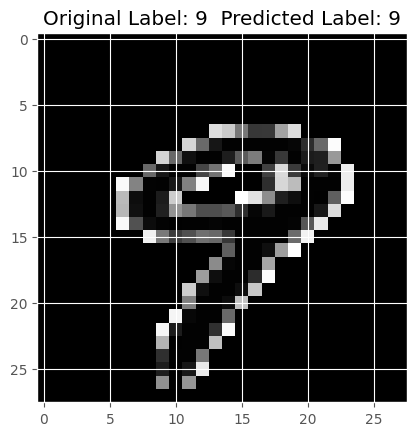

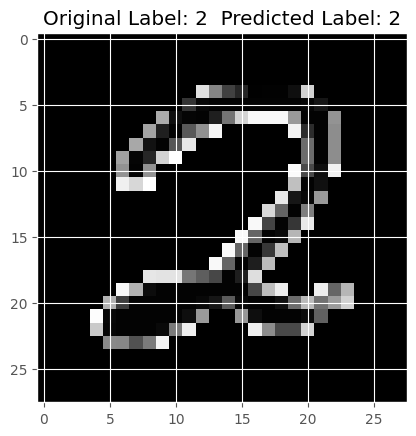

In [7]:
# K Nearest Neighbors

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



# old_stdout = sys.stdout
# log_file = open("summary.log","w")
# sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('/content/data')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_KNN.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# sys.stdout = old_stdout
# log_file.close()



# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------



**SVM**

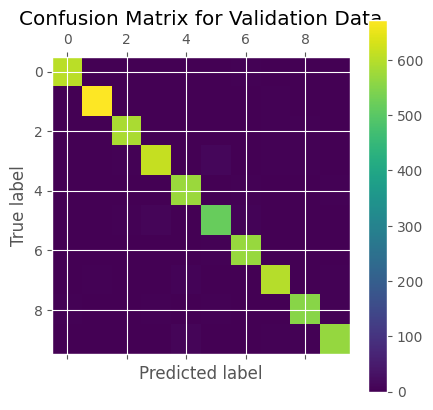

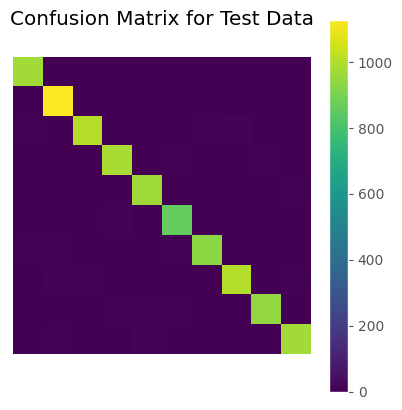

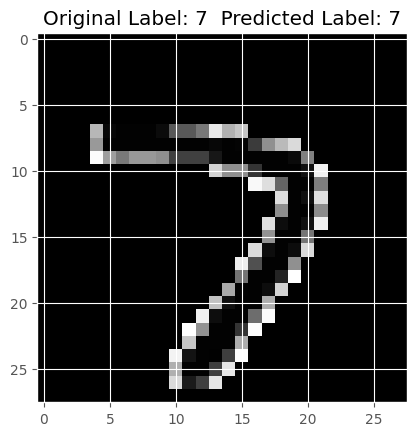

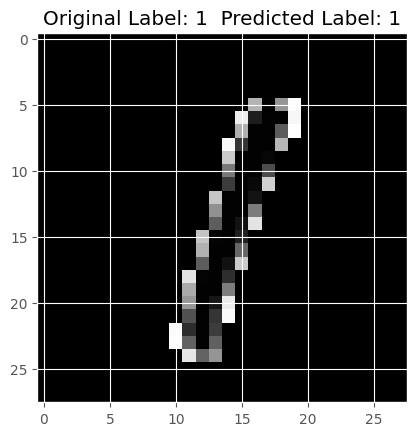

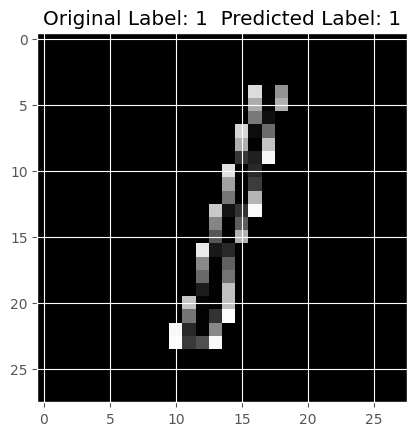

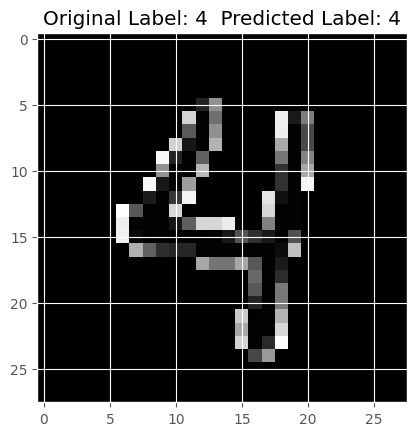

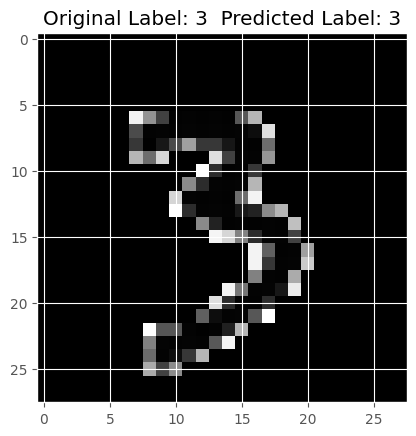

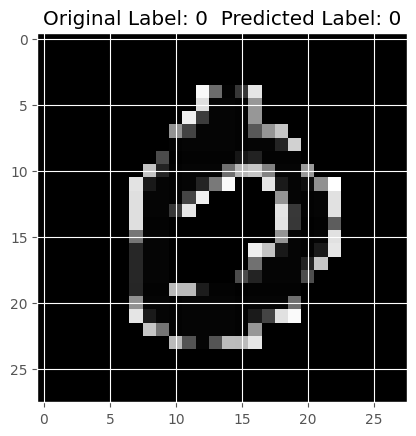

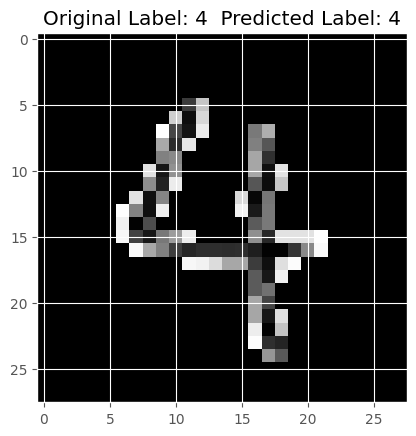

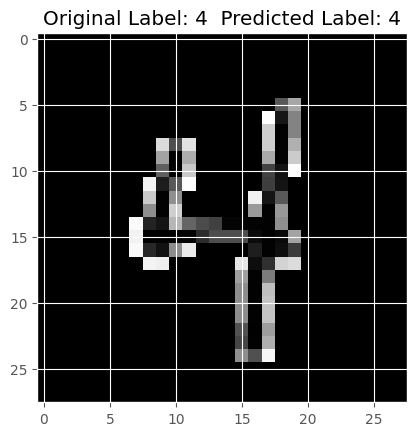

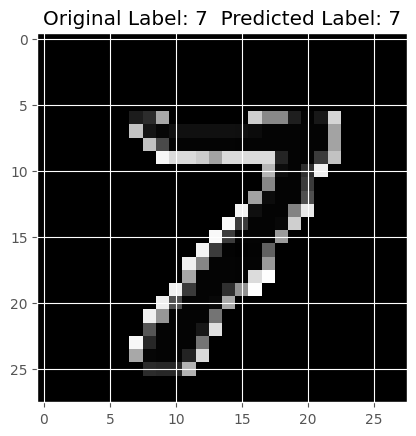

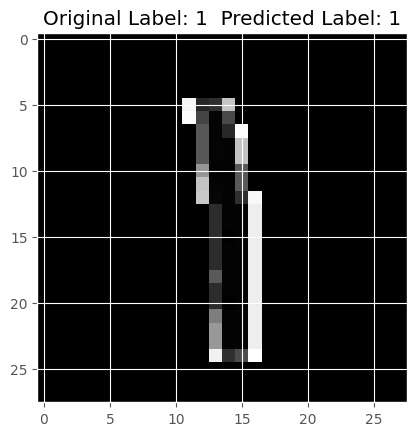

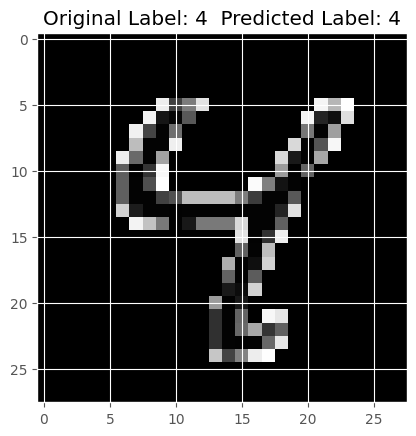

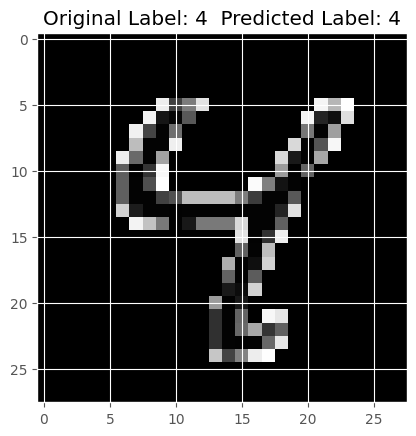

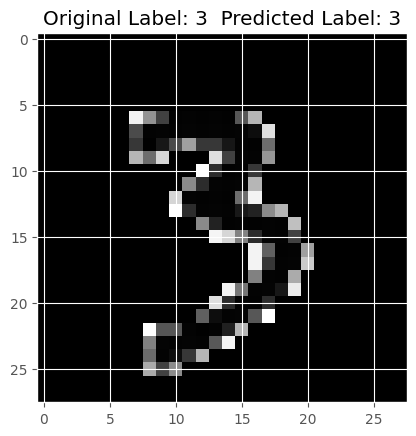

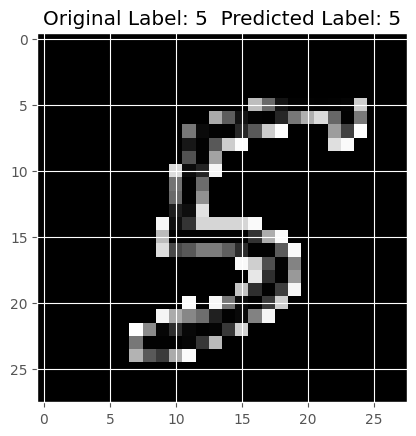

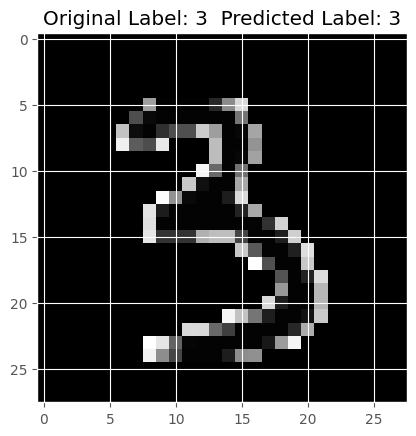

In [8]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file

# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('/content/data')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

with open('MNIST_SVM.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()


# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()



**Random Forest Classifier**

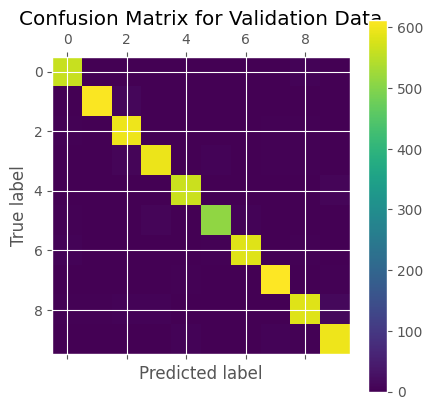

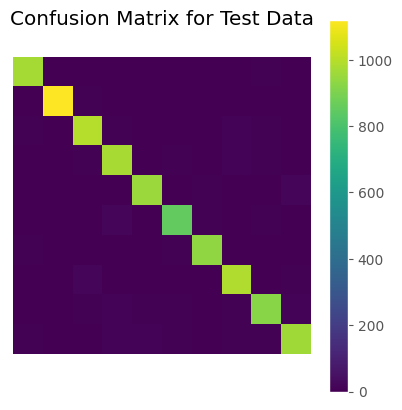

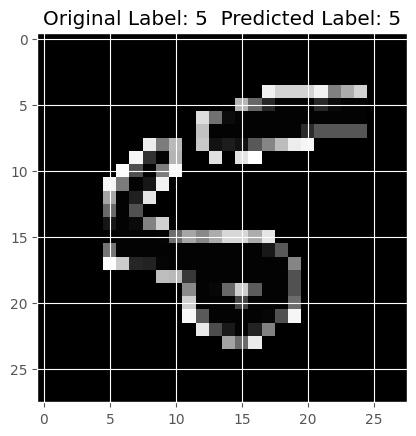

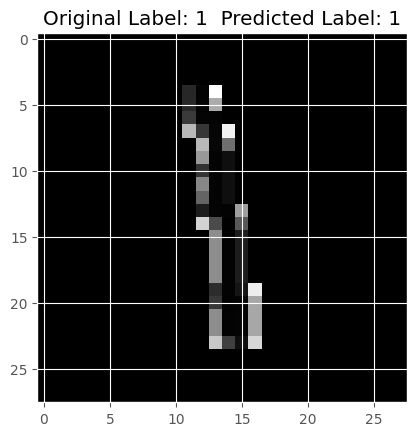

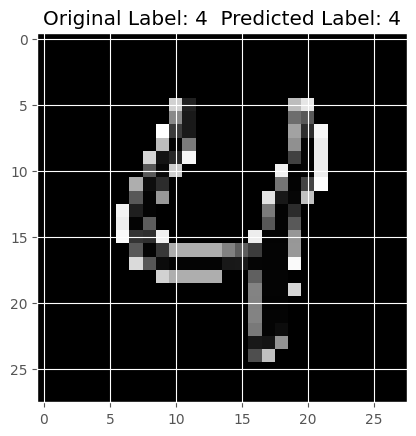

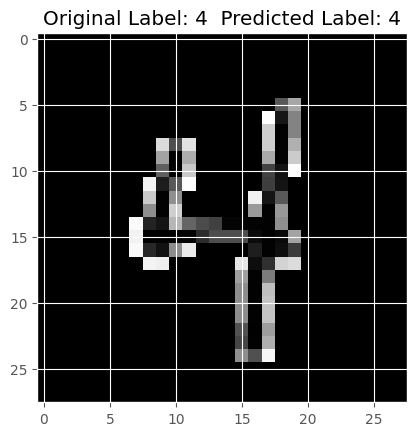

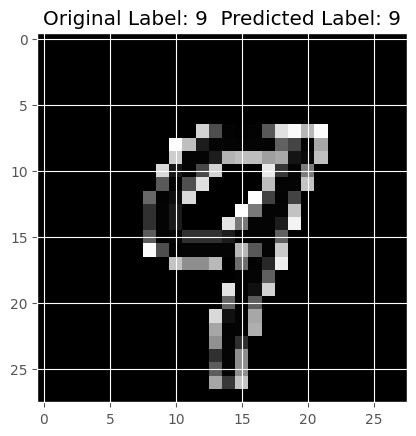

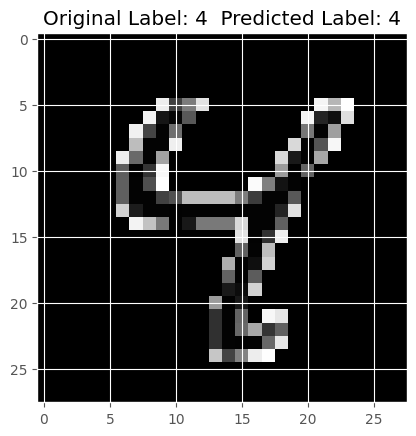

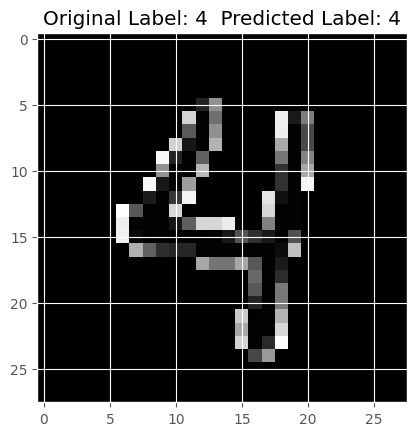

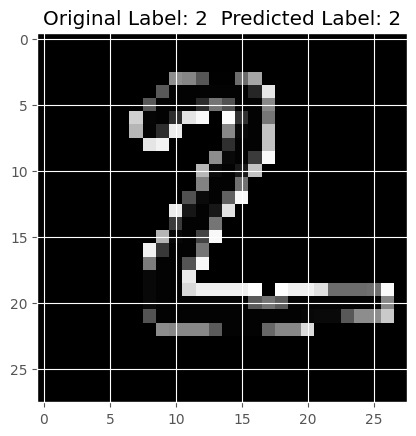

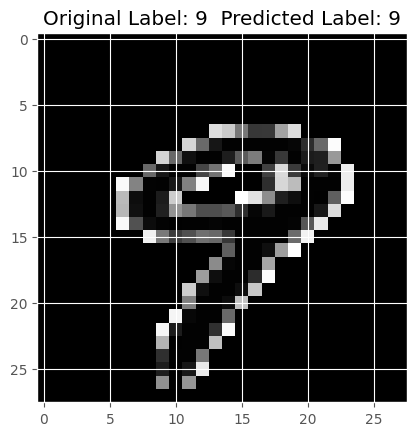

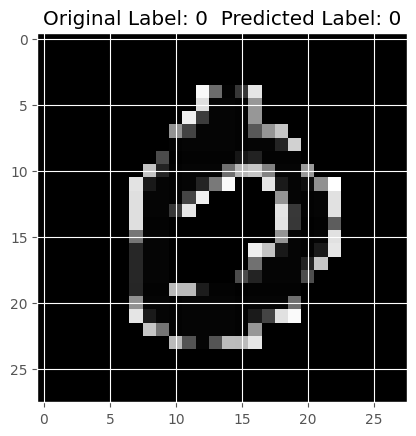

In [9]:
# Random Forest Classifier

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('/content/data')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_RFC.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()


# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,30,10)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

